In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
"""pd.options.display.float_format = '{:.3f}'.format"""


"pd.options.display.float_format = '{:.3f}'.format"

# Regression Model for 2013 NY State Crime Stats

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv',
                skiprows=4)
df = df.truncate(after=347)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN


In [64]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

Propertycrime = α + Population + Population^2 + Murder + Robbery

In [4]:
features = pd.DataFrame(df[['City', 'Population']])

In [5]:
features['Arson'] = df['Arson3'].fillna(0)

In [6]:
features['Population'] = features['Population'].apply(lambda x: int(x.replace(',','')))

In [7]:
"""features['PopulationSquared'] = features['Population'].apply(lambda x: x**2)"""

"features['PopulationSquared'] = features['Population'].apply(lambda x: x**2)"

In [8]:
features['Murder'] = df['Murder and\nnonnegligent\nmanslaughter']

In [9]:
features['Rape'] = df['Rape\n(legacy\ndefinition)2']

In [10]:
features['Robbery'] = df['Robbery']

In [11]:
features['AggravatedAssault'] = df['Aggravated\nassault']

In [12]:
features['PropertyCrime'] = df['Property\ncrime']

In [13]:
features['Burglary'] = df['Burglary']

In [14]:
features['Larceny'] = df['Larceny-\ntheft']

In [15]:
features['CarTheft'] = df['Motor\nvehicle\ntheft']

In [16]:
features.head()

,City,Population,Arson,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny,CarTheft
0,Adams Village,1861,0.0,0.0,0,0,0,12,2,10,0
1,Addison Town and Village,2577,0.0,0.0,0,0,3,24,3,20,1
2,Akron Village,2846,0.0,0.0,0,0,3,16,1,15,0
3,Albany,97956,0.0,8.0,30,227,526,"4,090",705,"3,243",142
4,Albion Village,6388,0.0,0.0,3,4,16,223,53,165,5


In [17]:
features['Robbery'] = features['Robbery'].apply(lambda x: float(str(x).replace(',','')))
features['Rape'] = features['Rape'].apply(lambda x: float(str(x).replace(',','')))
features['Murder'] = features['Murder'].apply(lambda x: float(str(x).replace(',','')))
features['AggravatedAssault'] = features['AggravatedAssault'].apply(lambda x: float(str(x).replace(',','')))
features['PropertyCrime'] = features['PropertyCrime'].apply(lambda x: float(str(x).replace(',','')))
features['Burglary'] = features['Burglary'].apply(lambda x: float(str(x).replace(',','')))
features['Larceny'] = features['Larceny'].apply(lambda x: float(str(x).replace(',','')))
features['CarTheft'] = features['CarTheft'].apply(lambda x: float(str(x).replace(',','')))
features['Arson'] = features['Arson'].apply(lambda x: float(str(x).replace(',','')))

"""features['Murder'] = (features['Murder'] > 0)
features['Robbery'] = (features['Robbery'] > 0)
features.replace({True:1, False:0}, inplace=True)"""

"features['Murder'] = (features['Murder'] > 0)\nfeatures['Robbery'] = (features['Robbery'] > 0)\nfeatures.replace({True:1, False:0}, inplace=True)"

## Overview:

In [18]:
features.head()
#

,City,Population,Arson,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny,CarTheft
0,Adams Village,1861,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0
1,Addison Town and Village,2577,0.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0
2,Akron Village,2846,0.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0
3,Albany,97956,0.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0
4,Albion Village,6388,0.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0


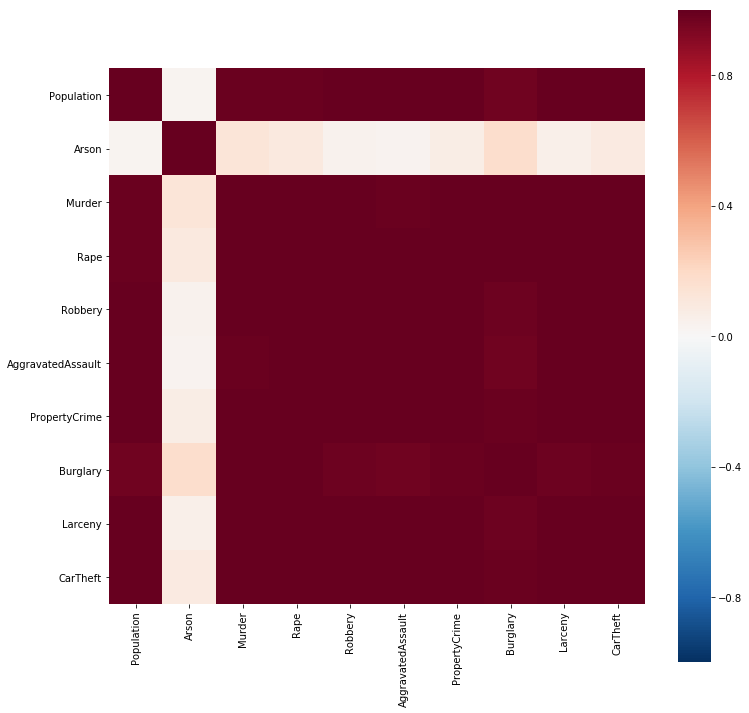

In [19]:
# Heatmap for features, pre-transformations:

plt.rcParams['figure.figsize'] = 12, 12

f = sns.heatmap(features.corr(), vmin= -1, vmax=1, square=True, cmap="RdBu_r")

plt.show()

In [20]:
for column in features.columns:
    print(features[column].describe())

count                   348
unique                  348
top       Irvington Village
freq                      1
Name: City, dtype: object
count    3.480000e+02
mean     4.003763e+04
std      4.500374e+05
min      5.260000e+02
25%      3.003000e+03
50%      7.233500e+03
75%      1.842750e+04
max      8.396126e+06
Name: Population, dtype: float64
count    348.000000
mean       1.005747
std        7.884612
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      132.000000
Name: Arson, dtype: float64
count    348.000000
mean       1.566092
std       18.303673
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      335.000000
Name: Murder, dtype: float64
count     348.000000
mean        5.864943
std        60.425452
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max      1112.000000
Name: Rape, dtype: float64
count      348.000000
mean        72.902299
std       1031.032873
min          0.

In [21]:
features['Arson'].value_counts()

0.0      294
1.0       23
2.0       11
4.0        5
3.0        5
5.0        2
10.0       2
57.0       1
132.0      1
22.0       1
15.0       1
6.0        1
8.0        1
Name: Arson, dtype: int64

In [22]:
features = features[features['Population'] < 200000]

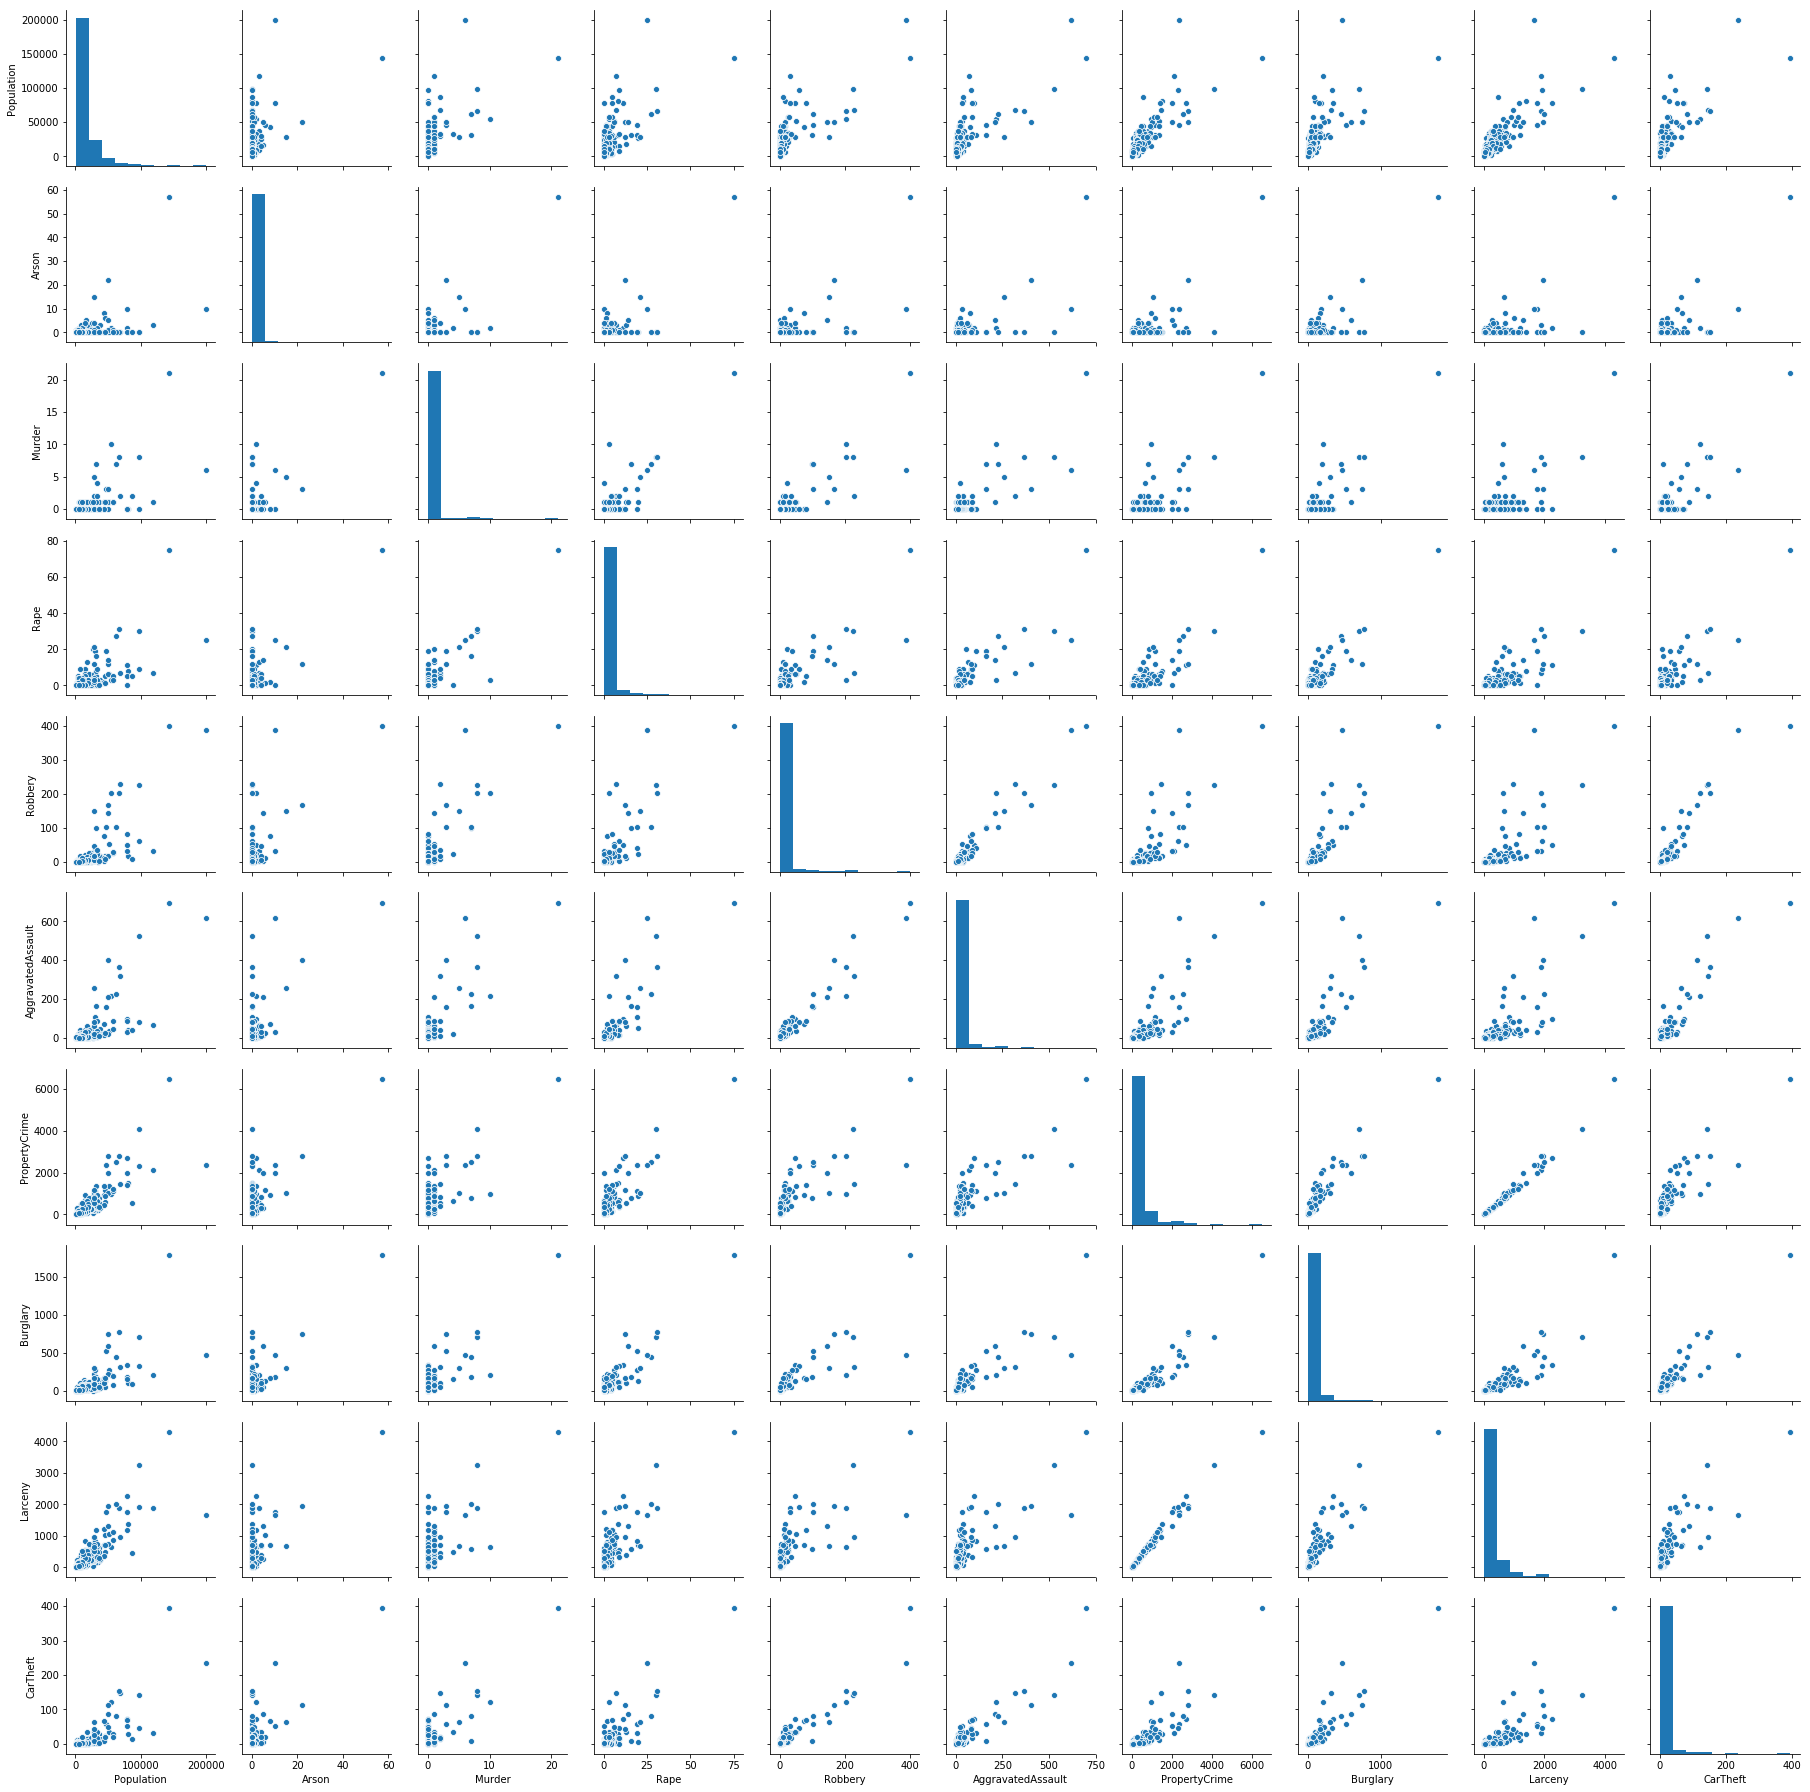

In [23]:
plt.rcParams['figure.figsize'] = 8, 8

sns.pairplot(features)

plt.show()

## Linear Regression pre-Transformation:

In [34]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = features['PropertyCrime'].values.reshape(-1, 1)
X = features[['Population', 'Murder', 'Robbery', 'Rape', 'AggravatedAssault']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.37204581e-02   1.50974610e+01  -5.02697051e+00   4.53854327e+01
    3.57797999e+00]]

Intercept: 
 [ 3.22989482]

R-squared:
0.873495390907


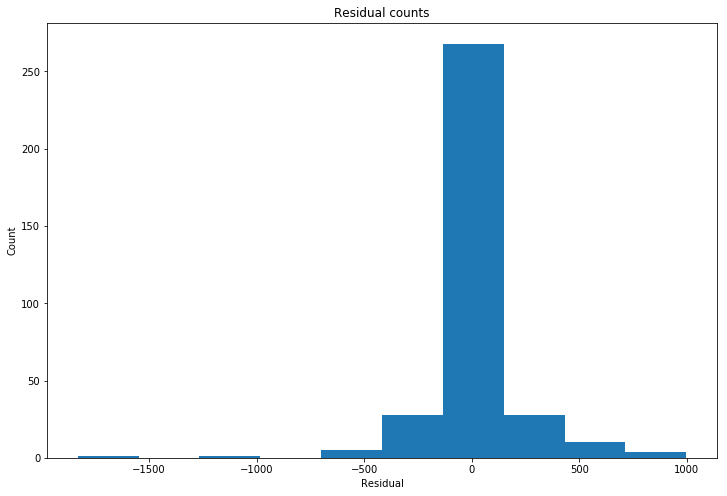

In [35]:
predicted = regr.predict(X).ravel()
actual = features['PropertyCrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

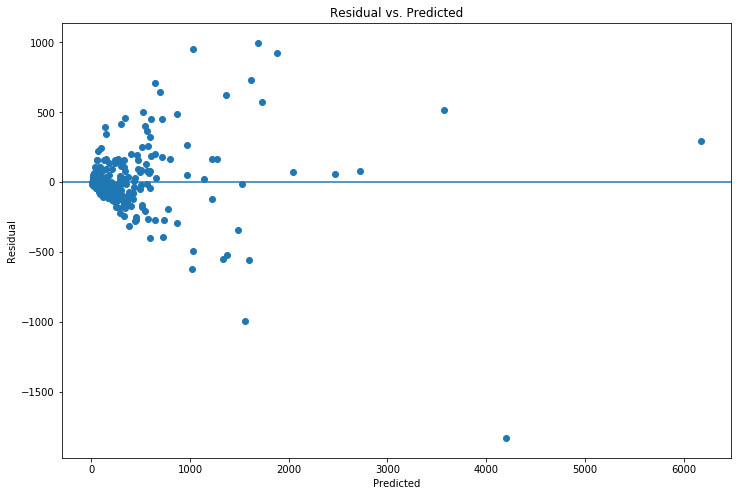

In [36]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## Transformations:

In [24]:
def plotcolumn(plotterm, features=features):
    plt.rcParams['figure.figsize'] = 12, 8
    fig = plt.figure()

    fig.add_subplot(231)
    plt.hist(features[plotterm])
    plt.title('{} Raw'.format(plotterm))

    fig.add_subplot(232)
    plt.hist(np.log(features[plotterm]+1))
    plt.title('{} Log'.format(plotterm))

    fig.add_subplot(233)
    plt.hist((features[plotterm])**2)
    plt.title('{} Square'.format(plotterm))
    
    fig.add_subplot(235)
    plt.hist(np.sqrt(features[plotterm]+1))
    plt.title('{} Square Root'.format(plotterm))
    
    ax3=fig.add_subplot(236)
    plt.hist(1/(features[plotterm]+1))
    plt.title('{} Inverse'.format(plotterm))
    plt.xticks(rotation=90)
    plt.show()

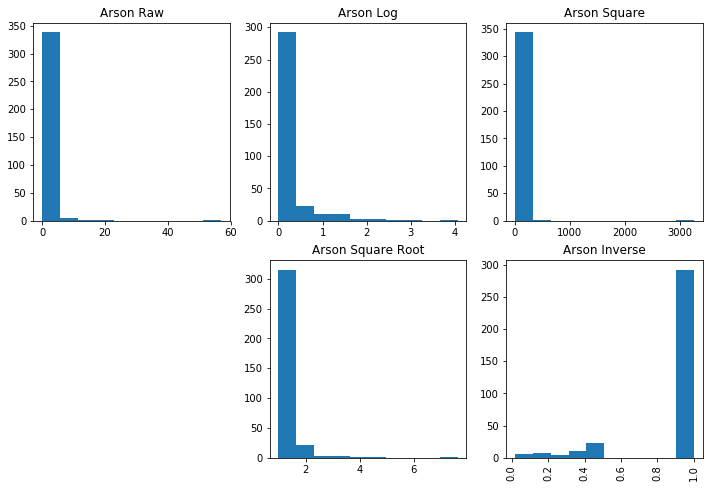

In [25]:
plotcolumn('Arson')

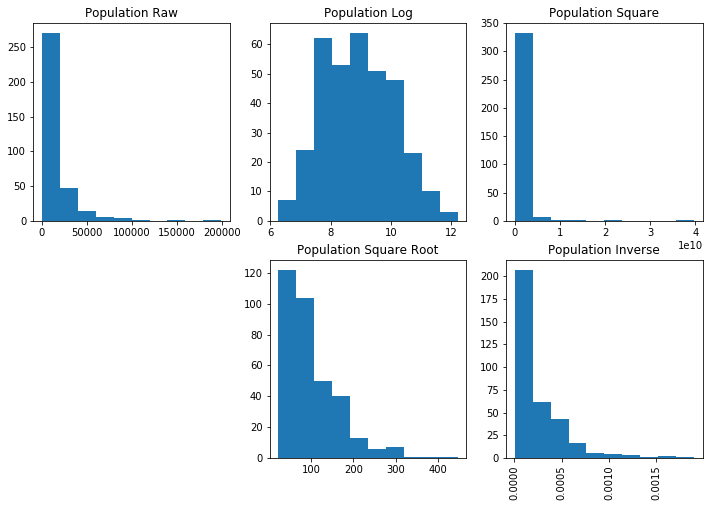

In [26]:
plotcolumn('Population')

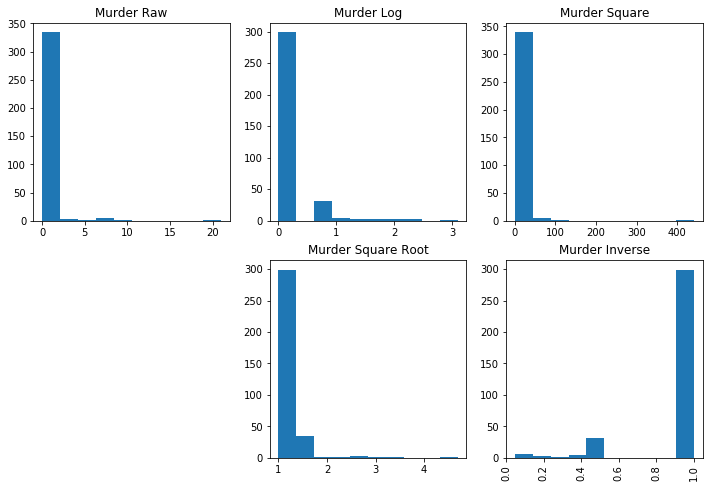

In [27]:
plotcolumn('Murder')

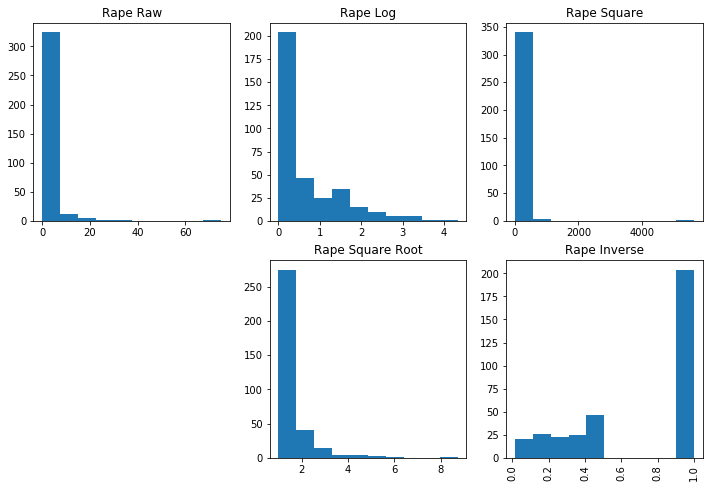

In [28]:
plotcolumn('Rape')

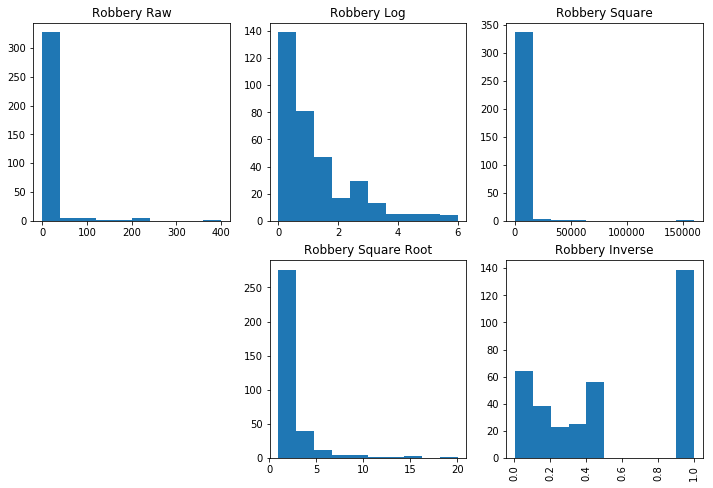

In [29]:
plotcolumn('Robbery')

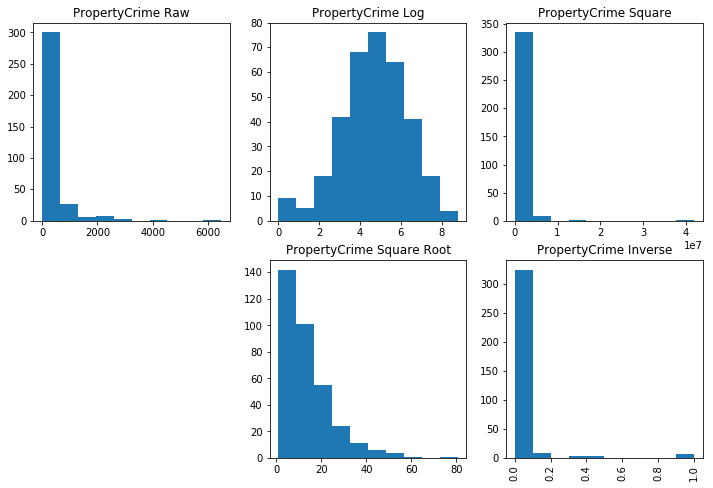

In [30]:
plotcolumn('PropertyCrime')

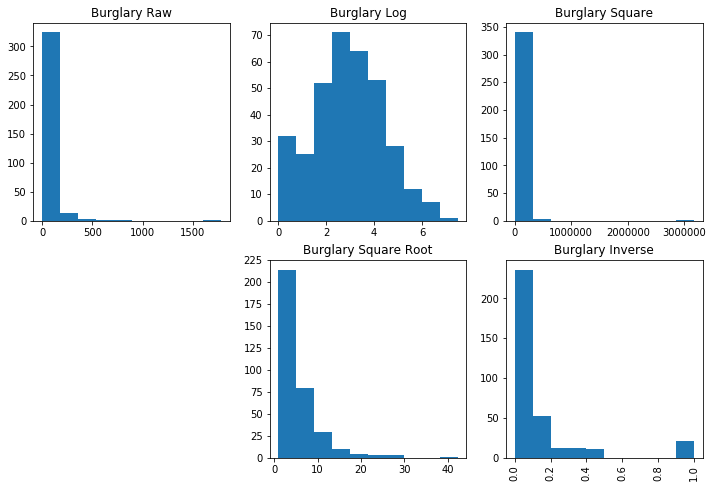

In [31]:
plotcolumn('Burglary')

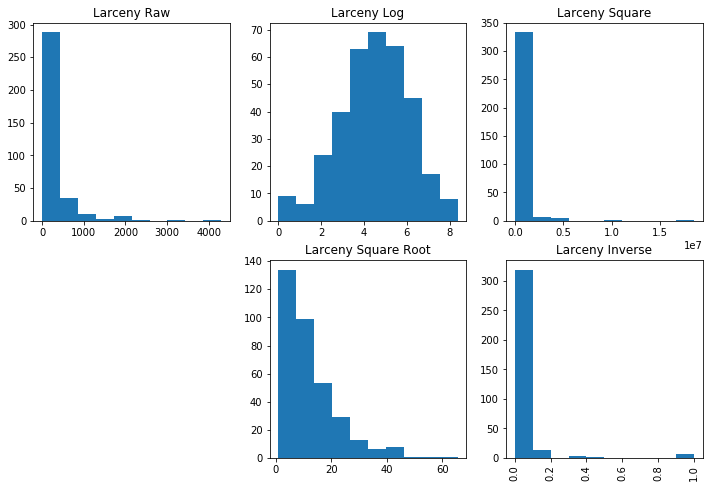

In [32]:
plotcolumn('Larceny')

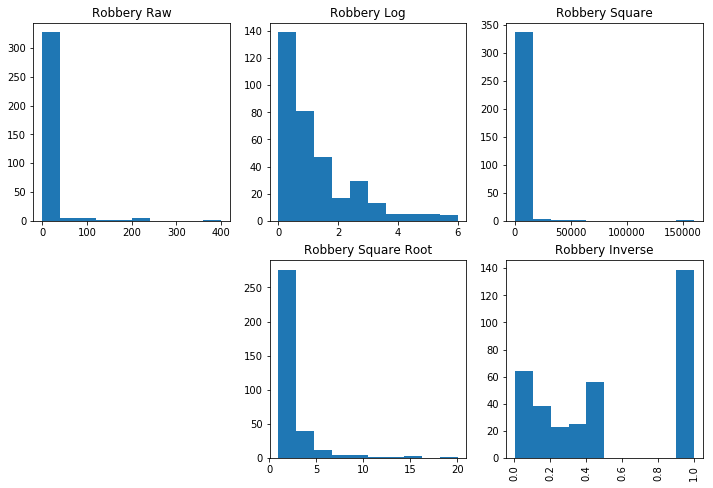

In [33]:
plotcolumn('Robbery')

In [37]:
features2 = features

In [38]:
features2['Population'] = np.log(features2['Population']+1)
features2['Murder'] = np.log(features2['Murder']+1)
features2['Robbery'] = np.log(features2['Robbery']+1)
features2['PropertyCrime'] = np.log(features2['PropertyCrime']+1)
features2['Rape'] = np.log(features2['Rape']+1)
features2['AggravatedAssault'] = np.log(features2['AggravatedAssault']+1)
features2['Burglary'] = np.log(features2['Burglary']+1)
features2['Larceny'] = np.log(features2['Larceny']+1)
features2['CarTheft'] = np.log(features2['CarTheft']+1)

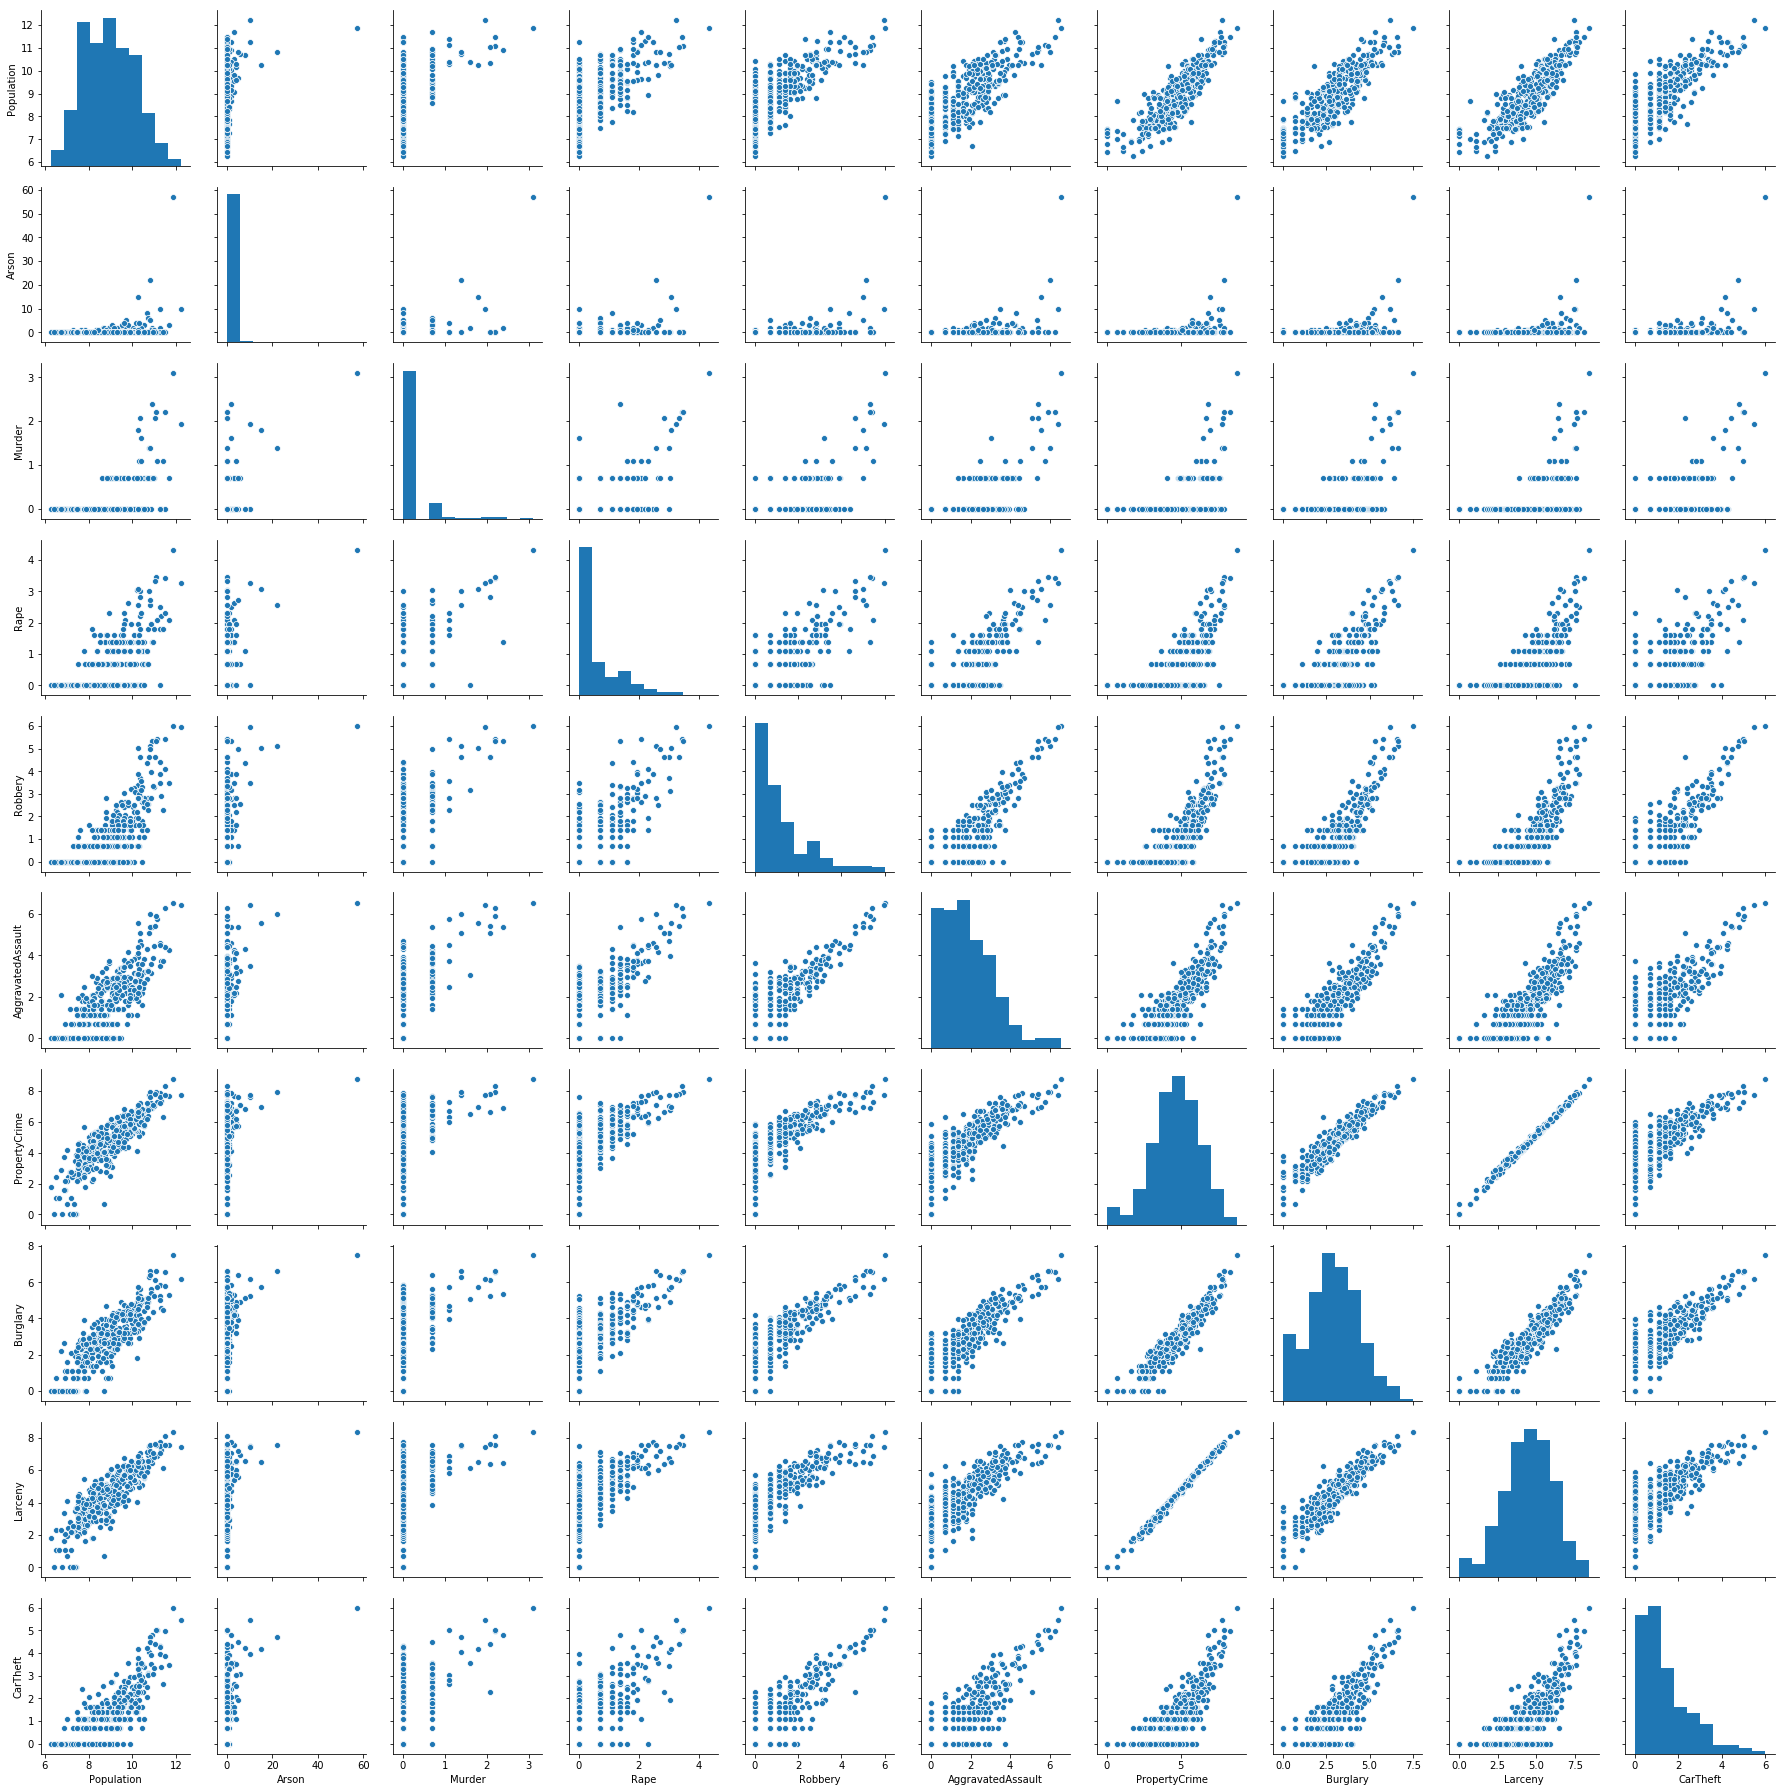

In [39]:
plt.rcParams['figure.figsize'] = 8, 8

sns.pairplot(features2)

plt.show()

## PCA on Transformed Data:

In [40]:
features_pca = features2.drop('City', axis=1)

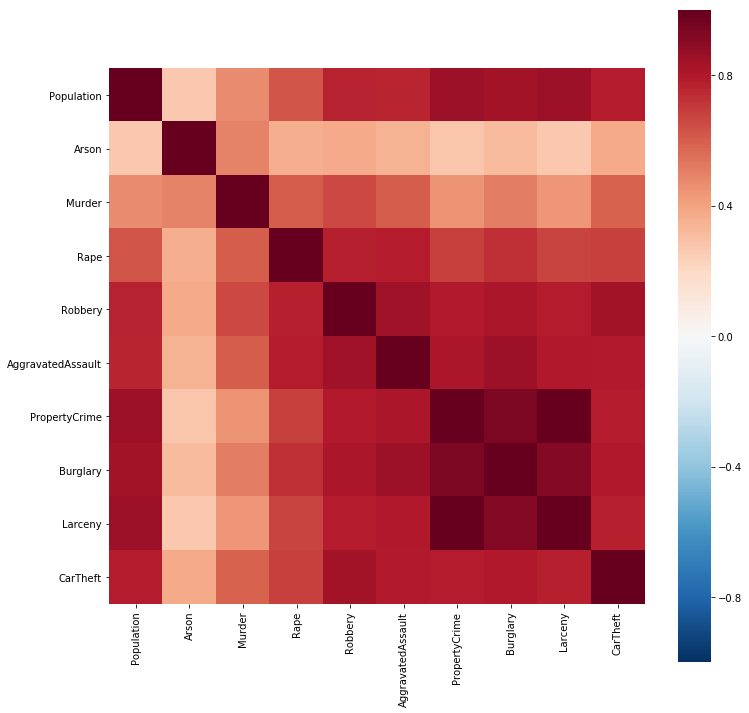

In [41]:
plt.rcParams['figure.figsize'] = 12, 12

f = sns.heatmap(features_pca.corr(), vmin= -1, vmax=1, square=True, cmap="RdBu_r")

plt.show()

In [42]:
X = StandardScaler().fit_transform(features_pca)

Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00290698  0.27321876  0.47542644  0.63303466  0.77539393  0.76494936
   0.85801217  0.84024155  0.85573698  0.78644169]
 [ 0.27321876  1.00290698  0.49721972  0.36317238  0.38243832  0.35227888
   0.27628442  0.31937019  0.26702788  0.37707218]
 [ 0.47542644  0.49721972  1.00290698  0.60839013  0.65940415  0.60332771
   0.4529892   0.51466608  0.44041148  0.58973811]
 [ 0.63303466  0.36317238  0.60839013  1.00290698  0.7799409   0.78572643
   0.68478093  0.73290449  0.67697771  0.6866378 ]
 [ 0.77539393  0.38243832  0.65940415  0.7799409   1.00290698  0.85266996
   0.79136438  0.82250569  0.78472802  0.84075095]
 [ 0.76494936  0.35227888  0.60332771  0.78572643  0.85266996  1.00290698
   0.81838599  0.86097244  0.80624847  0.79814196]
 [ 0.85801217  0.27628442  0.4529892   0.68478093  0.79136438  0.81838599
   1.00290698  0.94029542  1.00002559  0.78798184]
 [ 0.84024155  0.31937019  0.51466608  0.73290449  0.82250569  0.86097244
   0.94029542  1.00290698  0.91

In [43]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, len(features_pca.columns)).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.329058  ]
 [ 0.16228138]
 [ 0.24964767]
 [ 0.30916488]
 [ 0.34395583]
 [ 0.34331134]
 [ 0.34606407]
 [ 0.35072796]
 [ 0.34256112]
 [ 0.33345443]]
Eigenvalue 1: 7.187423393340454
----------------------------------------
Eigenvector 2: 
[[-0.1993404 ]
 [ 0.71016359]
 [ 0.51767255]
 [ 0.12755324]
 [ 0.06162965]
 [-0.00846041]
 [-0.25919421]
 [-0.16811969]
 [-0.26871851]
 [ 0.01229186]]
Eigenvalue 2: 1.1119272571788004
----------------------------------------
Eigenvector 3: 
[[-0.15815826]
 [-0.6636932 ]
 [ 0.46604796]
 [ 0.37114619]
 [ 0.1971392 ]
 [ 0.15033603]
 [-0.22470871]
 [-0.11824042]
 [-0.23046207]
 [ 0.02224313]]
Eigenvalue 3: 0.5529072499457245
----------------------------------------
Eigenvector 4: 
[[ 0.31687636]
 [-0.15457071]
 [ 0.47565962]
 [-0.7168454 ]
 [ 0.03463175]
 [-0.19242366]
 [ 0.00185298]
 [-0.07211529]
 [ 0.00372241]
 [ 0.30353542]]
Eigenvalue 4: 0.3486277732517869
----------------------------------------
Eigenvector 5: 
[[ 0.0606745 ]
 [ 0.0

### Scree Plot

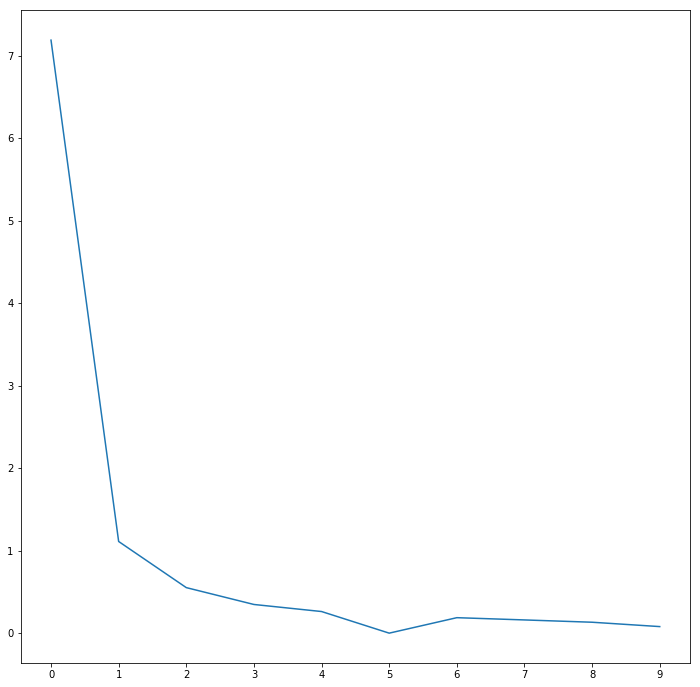

In [44]:
plt.plot(eig_val_cov)

plt.xticks(np.arange(0,(len(features_pca.columns))))
plt.show()

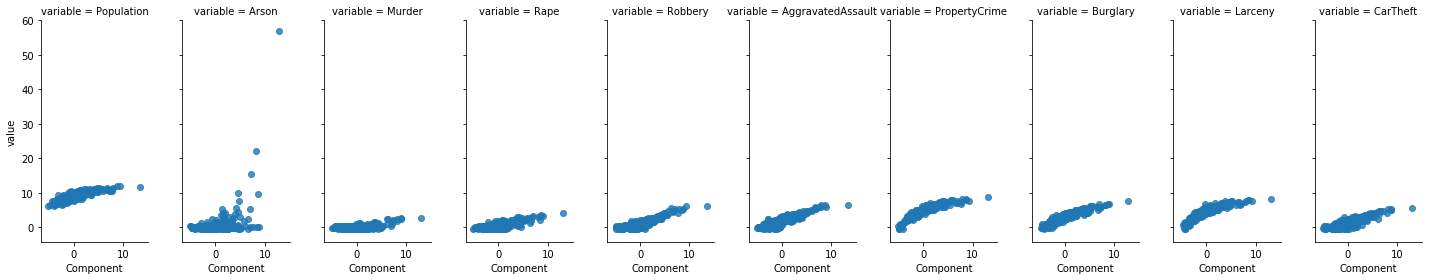

In [45]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = features_pca[features_pca.columns]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", height=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.71665903  0.11087043  0.05513046  0.03476173  0.02623725]


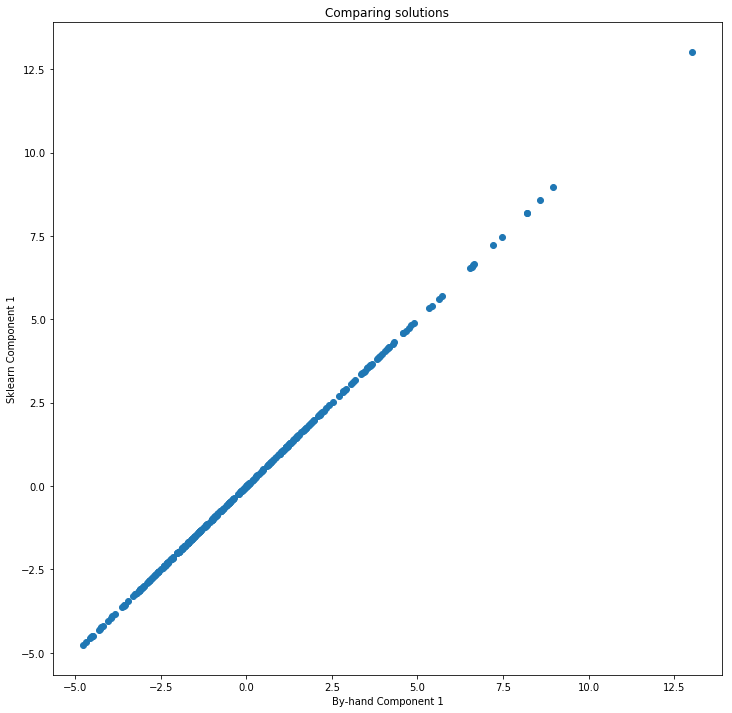

In [46]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

## Linear Regression of Model with five features:

In [47]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = features2['PropertyCrime'].values.reshape(-1, 1)
X = features2[['Population', 'Murder', 'Robbery', 'Rape', 'AggravatedAssault']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.71039794 -0.47392013  0.18424048  0.13002544  0.36188418]]

Intercept: 
 [-2.52165715]

R-squared:
0.807235425588


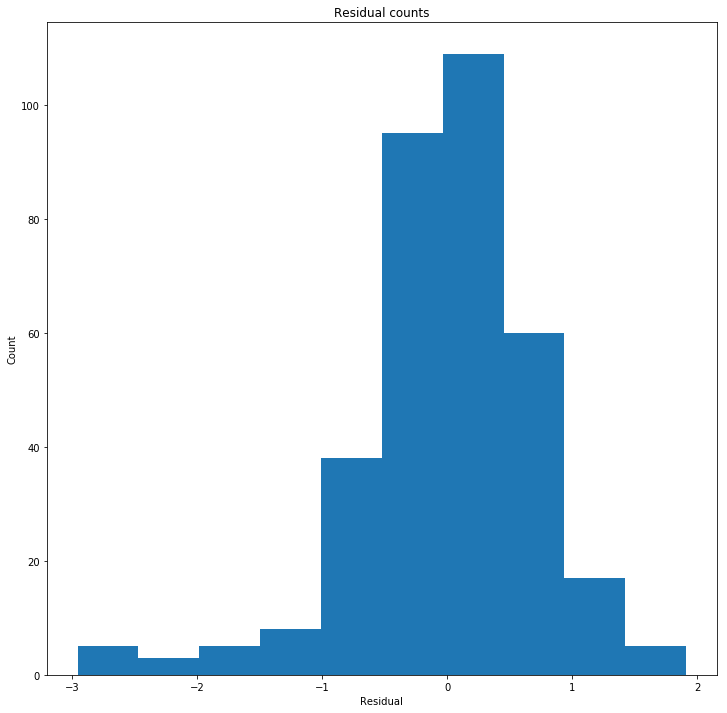

In [48]:
predicted = regr.predict(X).ravel()
actual = features2['PropertyCrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

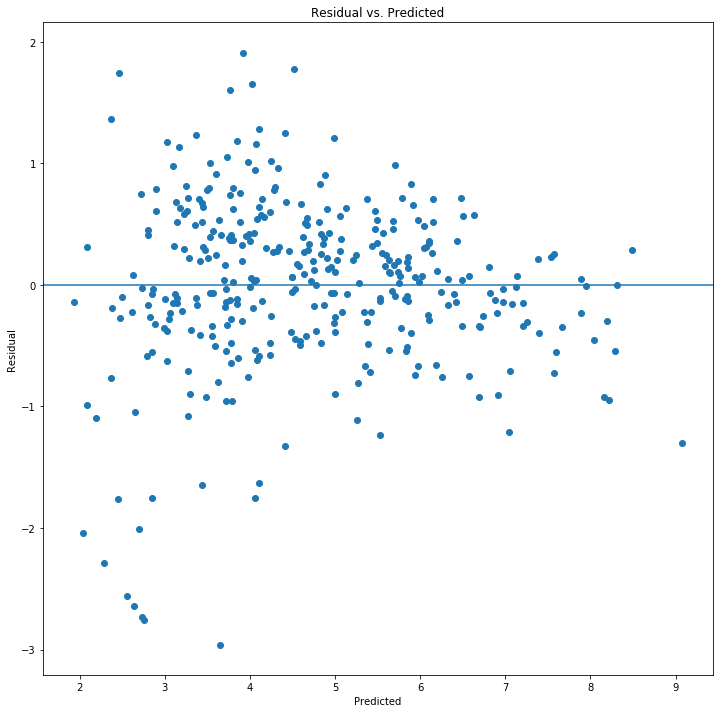

In [49]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [50]:
X.corr()

,Population,Murder,Robbery,Rape,AggravatedAssault
Population,1.000000,0.474048,0.773146,0.631200,0.762732
Murder,0.474048,1.000000,0.657493,0.606627,0.601579
Robbery,0.773146,0.657493,1.000000,0.777680,0.850198
Rape,0.631200,0.606627,0.777680,1.000000,0.783449
AggravatedAssault,0.762732,0.601579,0.850198,0.783449,1.000000


## Linear Regression with Violent Crime combined feature:

In [51]:
means = features2[['Murder','Robbery','Rape', 'AggravatedAssault']].mean(axis=0)
stds = features2[['Murder','Robbery','Rape', 'AggravatedAssault']].std(axis=0)
features2['ViolentCrime'] = ((features2[['Murder','Robbery','Rape', 'AggravatedAssault']] - means) / stds).mean(axis=1)
features2['ViolentCrime'] = features2['ViolentCrime'] - features2['ViolentCrime'].min()
features2['ViolentCrime'] = features2['ViolentCrime']/features2['ViolentCrime'].max()

In [56]:
#Linear Regression of model with pared-down features:
regr = linear_model.LinearRegression()
Y = features2['PropertyCrime'].values.reshape(-1, 1)
X = features2[['Population', 'ViolentCrime']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.87284264  3.01702038]]

Intercept: 
 [-3.53360457]

R-squared:
0.773225817079


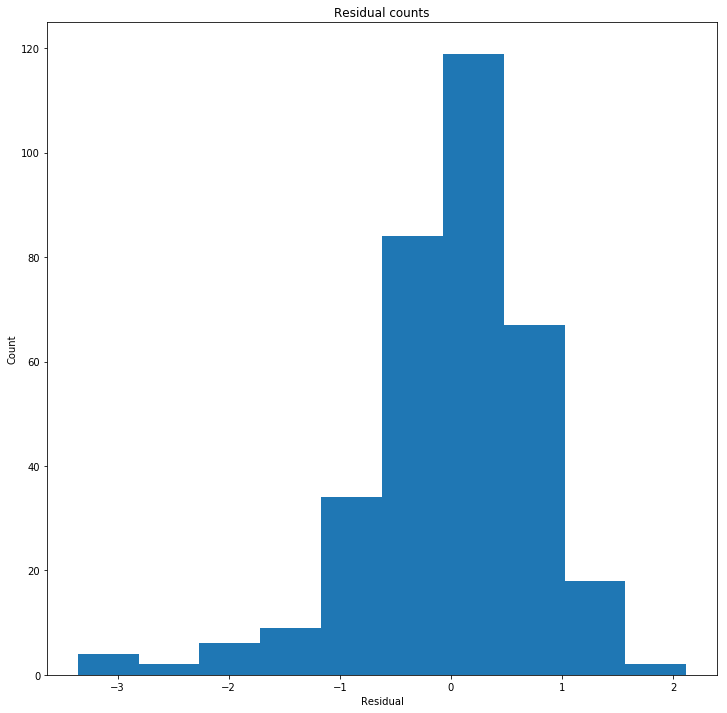

In [57]:
predicted = regr.predict(X).ravel()
actual = features2['PropertyCrime']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

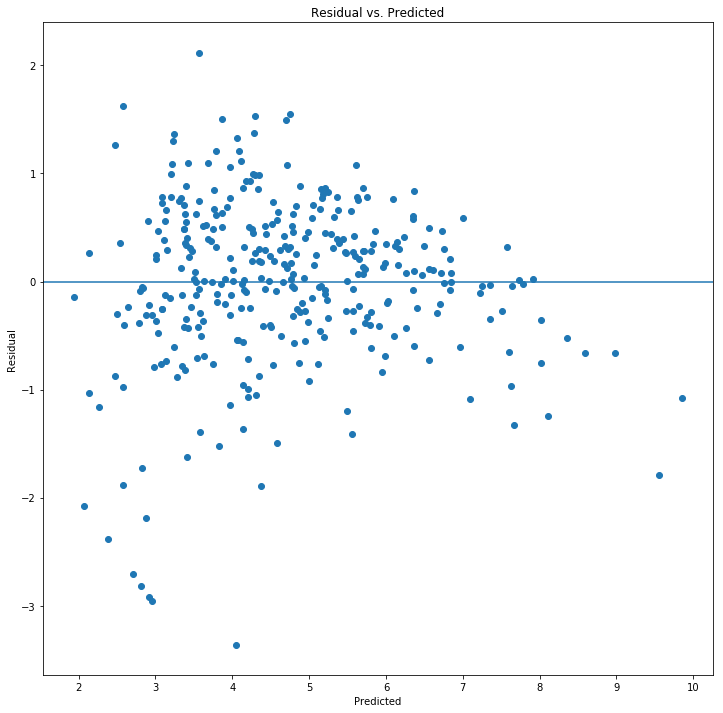

In [58]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [59]:
X.corr()

,Population,ViolentCrime
Population,1.000000,0.745414
ViolentCrime,0.745414,1.000000


## Linear Regression for Population only:

In [60]:
#Linear Regression of model with pared-down features:
regr = linear_model.LinearRegression()
Y = features2['PropertyCrime'].values.reshape(-1, 1)
X = features2[['Population']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.18856835]]

Intercept: 
 [-5.91245162]

R-squared:
0.73192332207


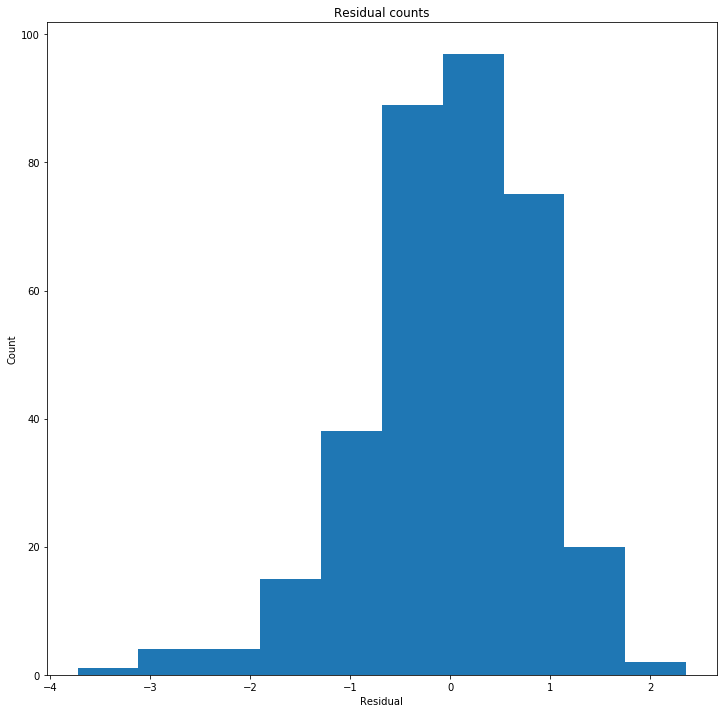

In [61]:
predicted = regr.predict(X).ravel()
actual = features2['PropertyCrime']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

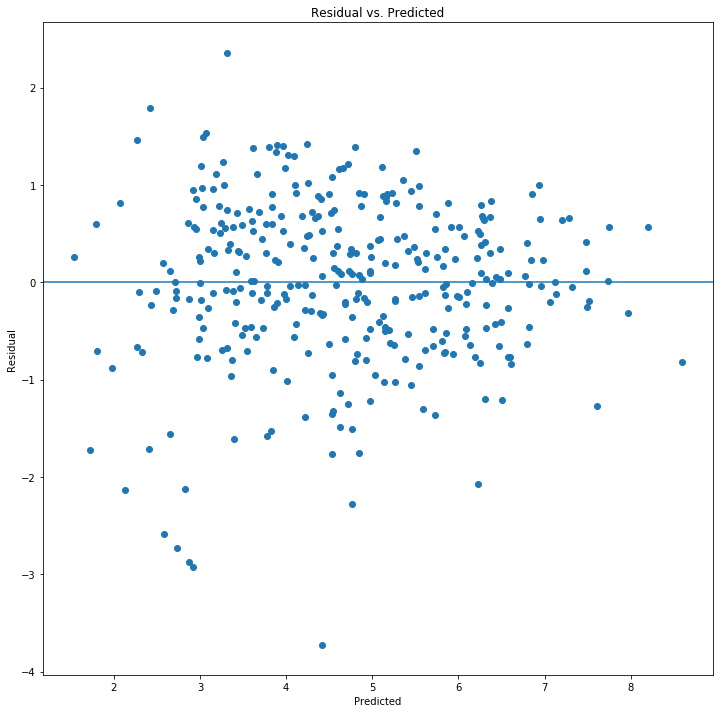

In [62]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()